<a href="https://colab.research.google.com/github/randallgyebi/Data-Science-Projects/blob/master/Titanic_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Classification

## Introduction
The titanic dataset seems to be the 'Hello World' of machine learning and is a collation of data about the individuals aboard the titanic and their survival.

The Titanic was passenger liner that sank in 1912 on the Atlantic ocean on voyage from Southhampton to New York City. Of the 2224 passengers and crew, over 67% passed away making it one of the worst maritime disasters ever.

### Problem Frame
The objective here is to predict the survival of a passenger when given their details only. The data set is already split by Kaggle and only data cleaning and model training are required.

### Performance Measure
Seeing as this is a classification problem, percentage accuracy will be a suitable measure of performance on the test set.

### Assumption Checks
Clarifying deliverables and data 

## Data Acquisition 
For the first step we just download the train and test data from [Kaggle](https://www.kaggle.com/c/titanic/data). 

### Create Workspace & Tools
Now we import the standard ML libraries for basic data wrangling.

In [0]:
import numpy as np
import pandas as pd
print("Complete")

Complete


### Load Data



In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd drive/My Drive/Developmental/Programming/Data Science/Projects/Kaggle: Titanic Classification


[Errno 2] No such file or directory: 'drive/My Drive/Developmental/Programming/Data Science/Projects/Kaggle: Titanic Classification'
/content/drive/My Drive/Developmental/Programming/Data Science/Projects/Kaggle: Titanic Classification


In [0]:

train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")
print ("Data Loaded")

Data Loaded


In [0]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Manipulation




### Data Check


In [0]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the describe we can already start to get some insight into the demographic of the passengers.

The 50th percentile for 'Passenger Class' is 3rd class, indicating that a majority of passengers were 3rd class passengers. 

A mean age of 30 and 75 percentile of 38 years old means the ages are skewed to the younger ages (>40) and fits with the life expencancy in the early 1900s (40 years). It can also be seen that most people did not have a sibling or parent (SibSp 75% = 1, ParCh 75% = 0 ).

With a mean of £32 and 75 percentile of £31, we can see that the top 25% paid the total of the bottom 75% therefore the wealth distrubution seems to skew toward a select few.

Now to check the nature of the dataset.

In [0]:
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Each row represents a passenger and their details in the 12 columns. "Sex", "Ticket", "Cabin" and 'Embarked' are all string type and transforming them into numerical representation or one-hot encoded would be more appropriate for training our model. The variety of inputs or each attribute will determine if one-hot encodes will be an efficient solution.

In [0]:
train_set["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
train_set["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

"Sex" and '"Embarked" only have 2 and 3 categories respectively and one-hot encoding can be a viable numerical representation of this attribute.

In [0]:
train_set["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F33            3
F2             3
E101           3
C22 C26        3
D20            2
D33            2
B22            2
C65            2
E24            2
E121           2
B49            2
B58 B60        2
D35            2
D36            2
E67            2
C92            2
B20            2
E8             2
E44            2
B35            2
B51 B53 B55    2
F4             2
C124           2
C83            2
C68            2
B5             2
              ..
C32            1
B30            1
C103           1
B50            1
E10            1
F38            1
B39            1
E34            1
A34            1
E50            1
D10 D12        1
D45            1
E31            1
E49            1
A7             1
C128           1
B69            1
T              1
D37            1
D46            1
E12            1
C91            1
A6             1
B3             1
A32            1
E36            1
A31            1
B82 B84       

In [0]:
train_set["Ticket"].value_counts()

1601                  7
CA. 2343              7
347082                7
CA 2144               6
347088                6
3101295               6
S.O.C. 14879          5
382652                5
19950                 4
LINE                  4
4133                  4
2666                  4
17421                 4
347077                4
113781                4
W./C. 6608            4
349909                4
PC 17757              4
113760                4
347742                3
230080                3
239853                3
PC 17582              3
24160                 3
PC 17755              3
F.C.C. 13529          3
PC 17572              3
13502                 3
C.A. 34651            3
110152                3
                     ..
PC 17595              1
27267                 1
347063                1
65304                 1
9234                  1
2687                  1
2628                  1
C.A. 29178            1
250653                1
330958                1
31418           

As a categorical attribute, "Ticket" and "Cabin" contains too many inputs to be one-hot encoded individually as a dense matrix will slow runtimes when training. However, a **sparse matrix** may be an option to explore.

Another option may be to **parse the first letter of the "Cabin"** and encode that. The "Ticket" attribute, on the other hand, doesn't seem to have any pattern to it and this may even introduce some noise into the analysis. Therein the **"Ticket" will be dropped**. 


### Data Preparation
Now we will create some custom transformers to be used on both the training and test datasets but before we start manipulating the data, Ill make a copy of the train data.

In [0]:
train_cleaning = train_set.copy(deep=True)

### Data Completion

In [0]:
train_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


With 891 entries, this data set is relatively small for machine learning standards. "Age", "Cabin" and "Embarked" all have null columns and the effect of this missing data and how to mitigate errors will have to be examined. "Cabin" is missing <77% of its data and the efficiacy of this feature will have to be examed.

For now we will fill the "Age" Nulls will be filled with the average, "Embarked" will be filled with the mode and "Fare" will be filled with median.

We will also drop the "PassengerID", "Name" and "Ticket".

In [0]:
train_cleaning["Age"].fillna(train_cleaning["Age"].mean(), inplace=True)

train_cleaning["Embarked"].fillna(train_cleaning["Embarked"].mode()[0], inplace=True)

train_cleaning["Fare"].fillna(train_cleaning["Fare"].median(), inplace=True)

train_cleaning.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)



print("Nulls filled and columns dropped")


Nulls filled and columns dropped


### Data Correcting
Although there are some values that are much above the average, these are not outliers per se and may be essential to some underlying relation. For this reason corrcting for outliers will be skipped for the dataset.

### Feature Engineering
No apparent feature engineeing or attribute creation which will greatlyincrease accurary is immediately apparent and may be considered later.

### Feature Convertion 
Now we convert the categorical data into numerical.

In [0]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

train_cleaning['Embarked_Code'] = label.fit_transform(train_cleaning['Embarked'])


train_clean = pd.get_dummies(train_cleaning)
train_clean.drop(["Embarked_Code"], 1)
train_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,2,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,2,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,2,0,1,0,0,1


## Data Exploration & Visualisation
### Data Visualisation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d6f979f28>,
      dtype=object)

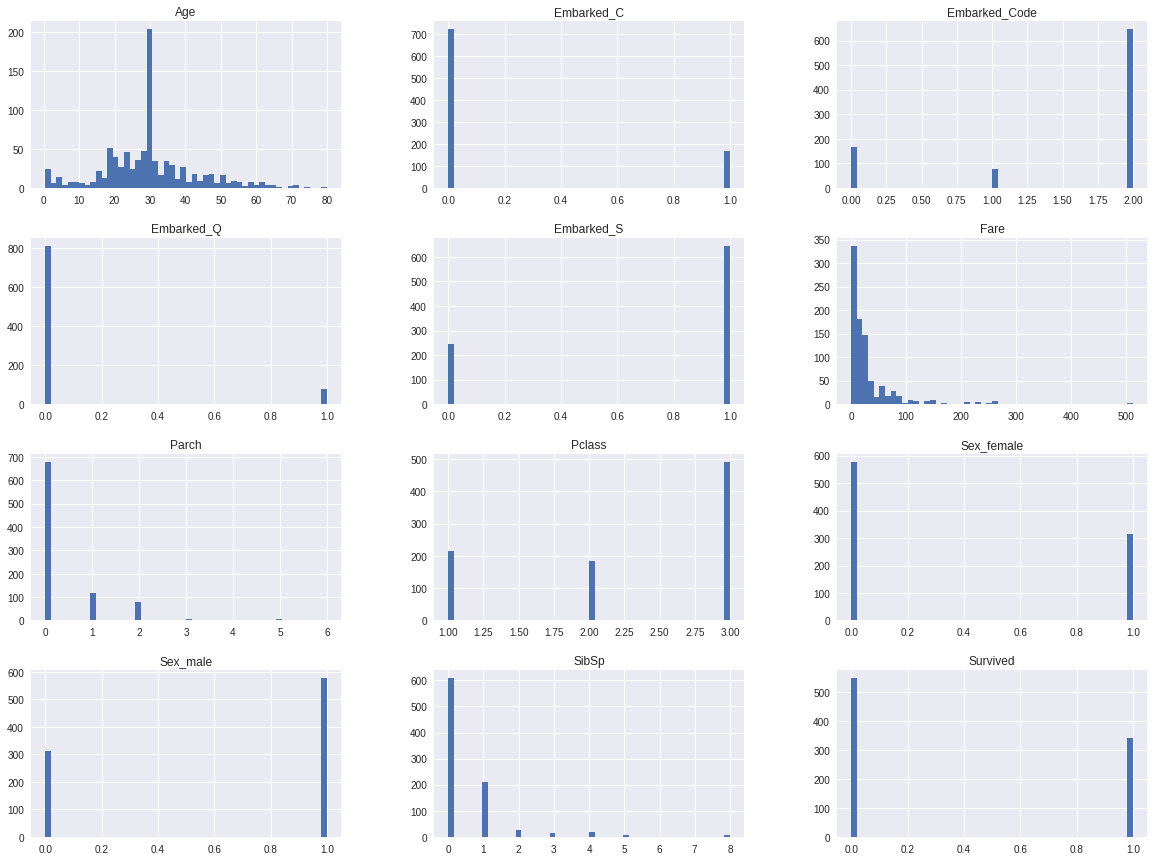

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
train_clean.hist(bins=50, figsize=(20,15))


These histograms seem to corroborate the deductions made from 'train_set.describe()'. We can also see that there are more instances of deaths than survivial in the 'Survived' attribute and this will affect the training process. We also see that many attributes are tail heavy and  will have to be manipulated to a more bell shaped distribution


### Data Exploration

looking for correlations
Experimenting with attribute combinations


In [0]:
corr_matrix = train_clean.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived         1.000000
Sex_female       0.543351
Fare             0.257307
Embarked_C       0.168240
Parch            0.081629
Embarked_Q       0.003650
SibSp           -0.035322
Age             -0.069809
Embarked_S      -0.149683
Embarked_Code   -0.167675
Pclass          -0.338481
Sex_male        -0.543351
Name: Survived, dtype: float64

There seems to be a weak correlation between the fare of a ticket and the survival of a passenger as well as a moderate negative correlation with the class of the passenger. Since both attributes relate to the financial commitment to the voyage it indicates that there may be a correlation for their financial standing. 

Surprisingly there seems to be no correlation with age even though the evacuation prioritised women and children. This relationship could be non-linear or may indeed be uncorrelated. A correlation with gender may appear after the 'Sex' attribute transformed.

To better visualuse any non linear relationships we will plot the relations.

In [0]:
from pandas.plotting import scatter_matrix

attributes = ['Survived', 'Fare', 'Parch', 'SibSp', 'Age', 'Pclass', 'Sex_female', 'Sex_male']
scatter_matrix(train_clean[attributes], figsize=(12,8))

In [0]:
corr_matrix = train_clean.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived         1.000000
Sex_female       0.543351
Fare             0.257307
Embarked_C       0.168240
Parch            0.081629
Embarked_Q       0.003650
SibSp           -0.035322
Age             -0.069809
Embarked_S      -0.149683
Embarked_Code   -0.167675
Pclass          -0.338481
Sex_male        -0.543351
Name: Survived, dtype: float64

This increase the relationship to a weak correlation and should improve the overall reliability of this attribute.

In [0]:
train_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked_Code    891 non-null int64
Sex_female       891 non-null uint8
Sex_male         891 non-null uint8
Embarked_C       891 non-null uint8
Embarked_Q       891 non-null uint8
Embarked_S       891 non-null uint8
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


## Model Selection
### Model Exploration
Now we will train and evaluate a selection of models on the training set. We use use ```cross_validate``` to score and shortlist an algorithm to optimise.



In [0]:
titanic = np.array(train_clean.drop(["Survived"],1))
titanic_labels = np.array(train_clean['Survived'])



In [0]:
from sklearn import ensemble, linear_model, gaussian_process, naive_bayes, tree, discriminant_analysis, svm, neighbors, model_selection

MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    ]


cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = titanic

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    cv_results = model_selection.cross_validate(alg, titanic, titanic_labels, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    alg.fit(titanic, titanic_labels)
    
    row_index+=1

    
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0, 0.5, 'Algorithm')

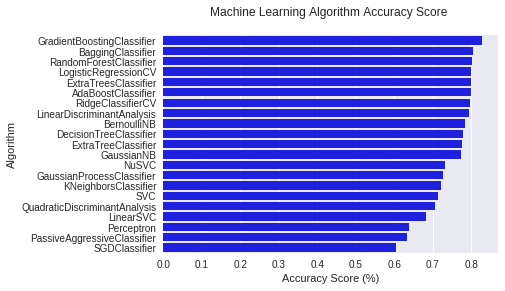

In [0]:
import seaborn as sns

sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'b')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

From the bar graph we can see that the Gradient Boosting Classifier performed best and would be the best suited model for predictions.